In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Preprocessing

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# 2. Exploratory Data Analysis

C:\Users\vaish\AppData\Local\Temp\ipykernel_20016\1537228670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


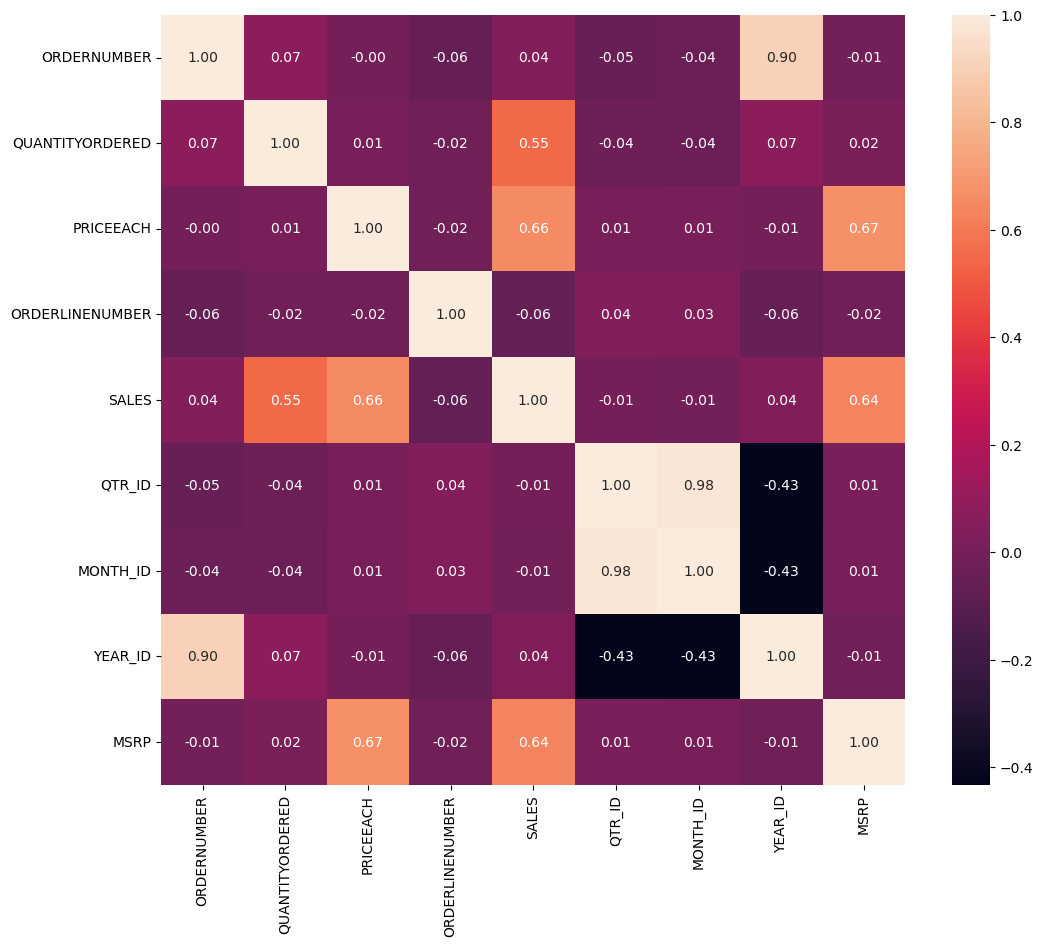

In [5]:
fig = plt.figure(figsize=(12,10))  # Creating a figure for visualizing data
sns.heatmap(df.corr(), annot=True, fmt='.2f')  # Creating a heatmap to explore correlations in the data
plt.show()  # Displaying the heatmap

In [6]:
df= df[['PRICEEACH', 'MSRP']]  # Selecting specific columns from the dataset for further analysis

In [7]:
df.head()

,PRICEEACH,MSRP
0,95.70,95
1,81.35,95
2,94.74,95
3,83.26,95
4,100.00,95


In [8]:
df.isna().any()

PRICEEACH    False
MSRP         False
dtype: bool

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [10]:
df.shape

(2823, 2)

# 3. Determining the Number of Clusters (Elbow Method)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\clust

<Axes: >

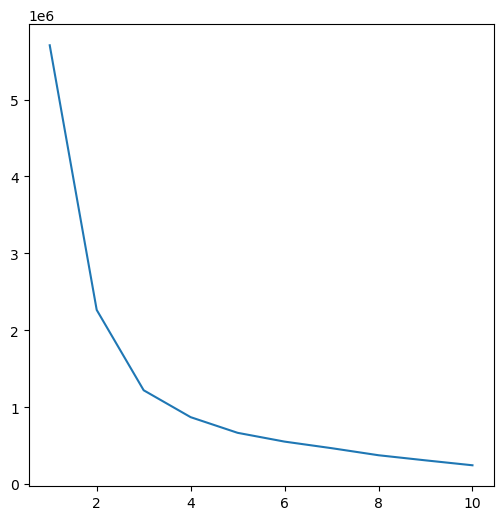

In [14]:
from sklearn.cluster import KMeans

inertia = []  # Initializing a list to store the inertia values
for i in range(1, 11):  # Loop for different numbers of clusters
    clusters = KMeans(n_clusters=i, init='k-means++', random_state=42)  # Creating KMeans model
    clusters.fit(df)  # Fitting the data
    inertia.append(clusters.inertia_)  # Appending inertia values to the list

plt.figure(figsize=(6, 6))  # Creating a plot for elbow method visualization
sns.lineplot(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y=inertia)  # Line plot for inertia values

# 4. K-Means Clustering

In [12]:
y_kmeans = kmeans.fit_predict(df)  # Fitting and predicting the clusters
y_kmeans  # Displaying the predicted clusters

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 0, 0, 0])

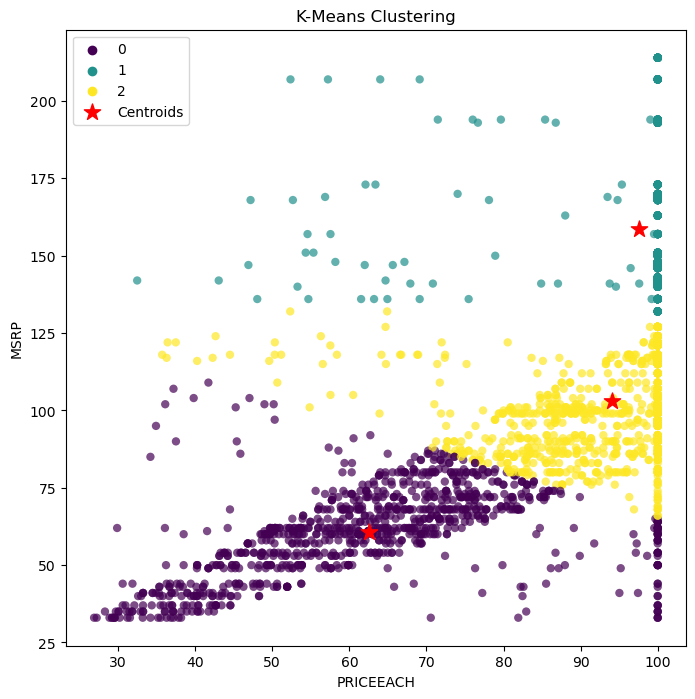

In [15]:
# Visualizing Clusters and Centroids
plt.figure(figsize=(8,8))  # Create a new figure for plotting the clusters

# Scatter plot for PRICEEACH vs. MSRP with different colors for each cluster (using 'hue' argument)
sns.scatterplot(x=df['PRICEEACH'], y=df['MSRP'], hue=y_kmeans, palette='viridis', edgecolor='none', alpha=0.7)

# Plotting centroids as red stars ('*') for each cluster center
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label='Centroids', s=150, marker='*')

plt.title('K-Means Clustering')  # Set the title of the plot
plt.xlabel('PRICEEACH')  # Set the label for the x-axis
plt.ylabel('MSRP')  # Set the label for the y-axis
plt.legend()  # Display the legend for the plot
plt.grid(False)  # Hide the grid lines for a cleaner view
plt.show()  # Show the finalized scatter plot with clusters and centroids


In [14]:
kmeans.cluster_centers_  # Showing the coordinates of the cluster centers

array([[ 62.49548902,  60.71556886],
       [ 97.59890263, 158.7202473 ],
       [ 94.03841567, 102.88841567]])

# Theory

**K-Means Clustering:**
K-Means is an unsupervised learning algorithm used for clustering or partitioning data into groups. It separates data points into K clusters by minimizing the sum of squares within each group. The primary steps involved in K-Means clustering are:
- Selection of the number of clusters (K)
- Randomly assigning initial cluster centroids
- Iteratively assigning data points to the nearest centroid and updating the centroids until convergence


**Elbow Method:**
The elbow method is a heuristic used to determine the optimal number of clusters in a dataset. It involves plotting the explained variation as a function of the number of clusters, and the "elbow" point represents the optimal number of clusters where the explained variation does not decrease significantly with additional clusters. It helps in identifying a suitable number of clusters in K-Means by observing the change in inertia or within-cluster sum of squares against the number of clusters.

**Inertia:**
Inertia, also known as within-cluster sum of squares, is a measure used to evaluate the goodness of fit of the clustering algorithm. It calculates the sum of squared distances of data points to their assigned cluster centers. Inertia decreases as the number of clusters increases. It is used in the elbow method to find the optimal number of clusters.

These methods and algorithms are commonly used in exploratory data analysis and data segmentation to uncover patterns or structures within datasets and assist in various data-driven decision-making processes.